<a href="https://colab.research.google.com/github/Hafsyari/Tugas-4/blob/main/image_fundamental/resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/retaam085/Kecerdasan-Buatan/main/Dataset/Daun%20Kemangi/051.jpg --no-check-certificate

--2021-11-10 12:40:45--  https://raw.githubusercontent.com/retaam085/Kecerdasan-Buatan/main/Dataset/Daun%20Kemangi/051.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109018 (106K) [image/jpeg]
Saving to: ‘051.jpg’

051.jpg             100%[===================>] 106.46K  --.-KB/s    in 0.01s   

2021-11-10 12:40:45 (7.36 MB/s) - ‘051.jpg’ saved [109018/109018]



In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "051.jpg"
}

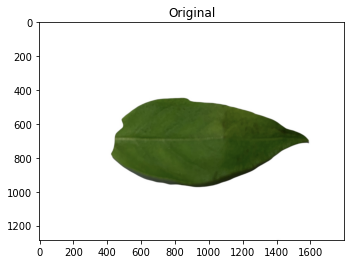

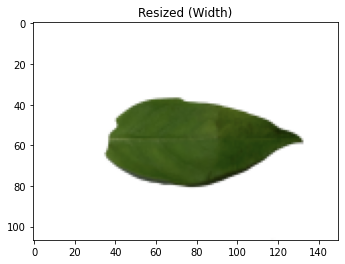

In [5]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

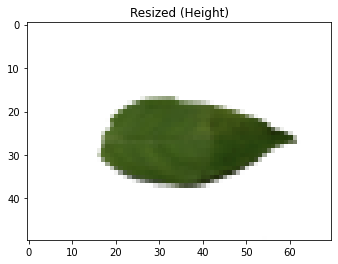

In [6]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

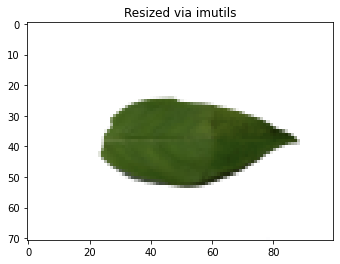

In [7]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


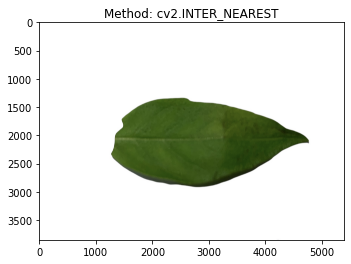

[INFO] cv2.INTER_LINEAR


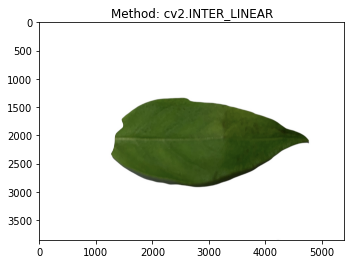

[INFO] cv2.INTER_AREA


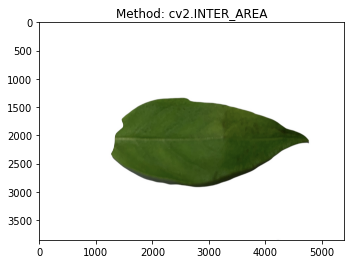

[INFO] cv2.INTER_CUBIC


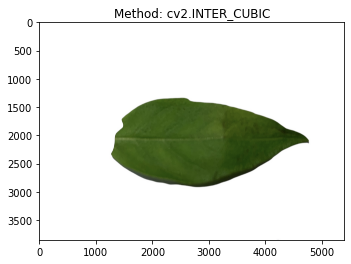

[INFO] cv2.INTER_LANCZOS4


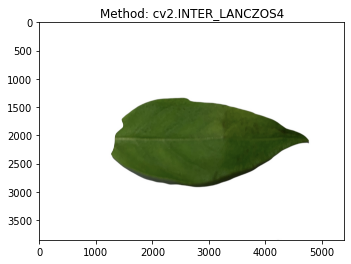

In [8]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)